<a href="https://colab.research.google.com/github/simulamet-host/video_analytics/blob/main/Demo/Cellular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import logging 
logging.disable(sys.maxsize)

from e2evideo import video_preprocessing, image_preprocessing, feature_extractor
from  demo_helpers import display_video_frames

import warnings
warnings.filterwarnings("ignore")

## Load images

In [2]:
input_path = 'Cellular/images'

output_path = 'Cellular'


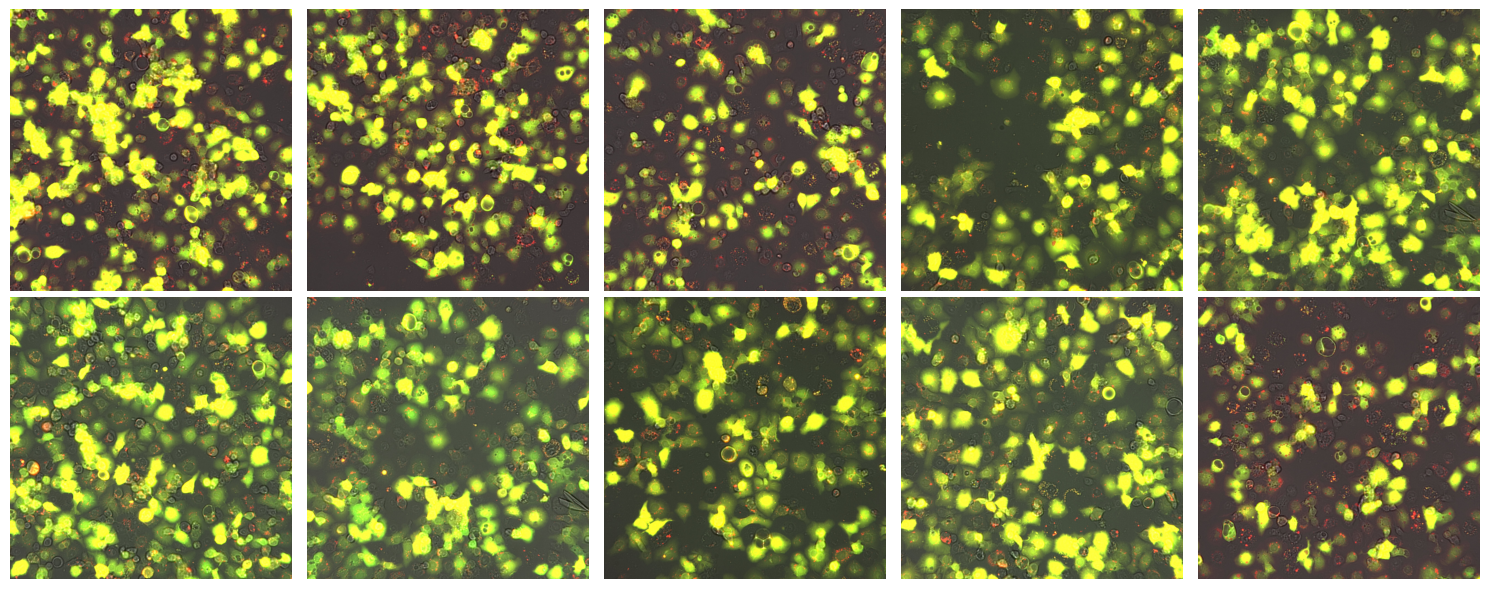

In [3]:
import os
import matplotlib.pyplot as plt
import cv2

def display_cells_images(input_path):
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.flatten()

    count = 0
    for root, dirs, files in os.walk(input_path):
        for file in files:
            if file.endswith(".jpg"):
                if count < 10:
                    image_path = os.path.join(root, file)
                    cell_img = cv2.imread(image_path)
                    cell_img = cv2.cvtColor(cell_img, cv2.COLOR_BGR2RGB)
                    axes[count].imshow(cell_img)
                    axes[count].axis("off")
                    count += 1
                else:
                    break

    for i in range(count, len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()



display_cells_images(input_path)

## Feature Extractor

In [4]:
feature_config = feature_extractor.FeatureExtractorConfig(
       input_path = input_path,
       output_path = output_path
)
fe = feature_extractor.FeatureExtractor(feature_config)

filenames_, feature_vec_ = fe.extract_dinov2_features()



Read a total of  53 images


In [5]:
import pandas as pd

connected_components_df_ = pd.read_csv(
            os.path.join(output_path, "connected_components.csv")
        )

In [6]:
feature_extractor.plot_tsne_3d(
    feature_vec_,
    connected_components_df_,
    filenames_,
    f"{output_path}/embeddings_dinvo2.html",
)

[t-SNE] Computing 52 nearest neighbors...
[t-SNE] Indexed 53 samples in 0.001s...
[t-SNE] Computed neighbors for 53 samples in 0.224s...
[t-SNE] Computed conditional probabilities for sample 53 / 53
[t-SNE] Mean sigma: 16.387525
[t-SNE] KL divergence after 250 iterations with early exaggeration: 101.021652
[t-SNE] KL divergence after 300 iterations: 1.284479


In [7]:
from IPython.core.display import display, HTML
with open(f"{output_path}/embeddings_dinvo2.html", 'r') as f:
    html_content = f.read()

display(HTML(html_content))
